In [1]:
import torch
import torch.nn as nn
import numpy as np
from gensim.models import KeyedVectors
from main import run

In [2]:
def load_word2vec_embeddings(file_path, word_to_index, embedding_dim):
    model = KeyedVectors.load_word2vec_format(file_path, binary=True)
    embedding_matrix = np.zeros((len(word_to_index) + 1, embedding_dim))

    for word, index in word_to_index.items():
        embedding_matrix[index] = model[word] if word in model else np.zeros(embedding_dim)

    return embedding_matrix

In [3]:
class SimpleRNNWord2Vec(nn.Module):
    def __init__(self, embedding_matrix, hidden_size, output_size, embedding_dim):
        super(SimpleRNNWord2Vec, self).__init__()
        self.embedding = nn.Embedding.from_pretrained(torch.FloatTensor(embedding_matrix), padding_idx=0)
        self.rnn = nn.RNN(input_size=embedding_dim, hidden_size=hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.embedding(x)
        output, _ = self.rnn(x)
        output = self.fc(output)
        return output

Epoch: 15/15
Validation Loss: 0.0709
Validation Macro F1: 0.7159
Training Macro F1: 0.8090


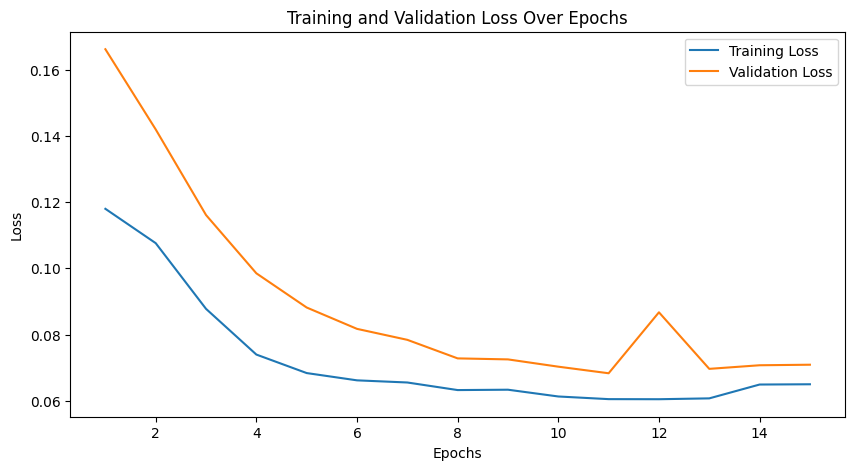

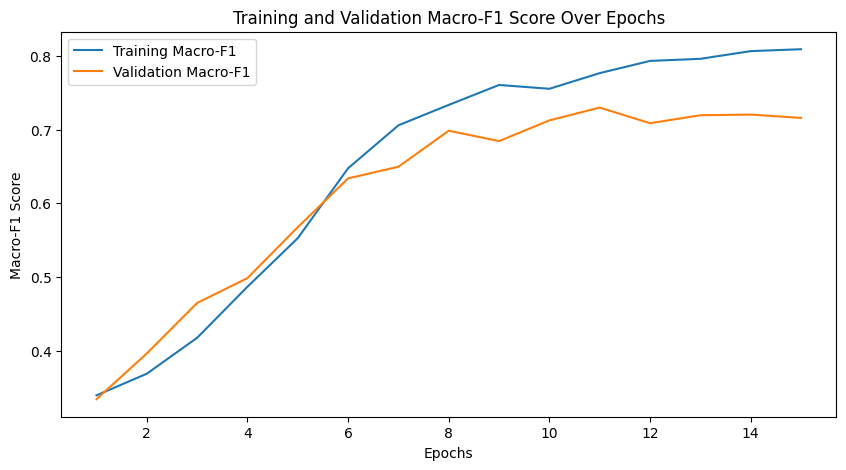

Final Test Accuracy: 0.9714
Final Test Macro F1: 0.6824


In [4]:
run(load_word2vec_embeddings, 300, "../word_embeddings/GoogleNews-vectors-negative300.bin", 
    SimpleRNNWord2Vec, "rnn_word2vec")